Carga de librerías

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from yaml import safe_load
from sklearn.linear_model import LinearRegression

Definición de rutas relativas del archivo

In [2]:
ROOT = os.path.dirname(os.getcwd())
DATA = os.path.join(ROOT, 'data')

Carga de archivo de configuración

In [3]:
with open(file=os.path.join(ROOT, 'config.yml'), mode='r') as file:
    CONFIG = safe_load(file)
file.close()

# Regresión Logística

La regresión logística es la manera estándar de modelar variables respuesta binarias.

## Predictores únicos

Para ilustar el funcionamiento básico de una regresión logística, se empieza partiendo de una regresión con un único predictor de un problema de preferencias políticas electorales en las elecciones de 1992 de USA, ignorando aquellos votos que se abstuvieron o que votaron por representantes distintos a los partidos Republicano y Demócrata

In [5]:
# Carga de datos completos
datos = pd.read_csv(
    os.path.join(DATA, 'ideo.csv'))

# Filtrar datos para regresión pred. único
datos_predictor_unico = (
    datos
    .query(expr="year == 1992")
    .query(expr="presvote < 3")
    .filter(items=['income', 'presvote'])
    .assign(vote = lambda _df: _df.presvote - 1)
)

Se hace una inspección visual rápida de los datos

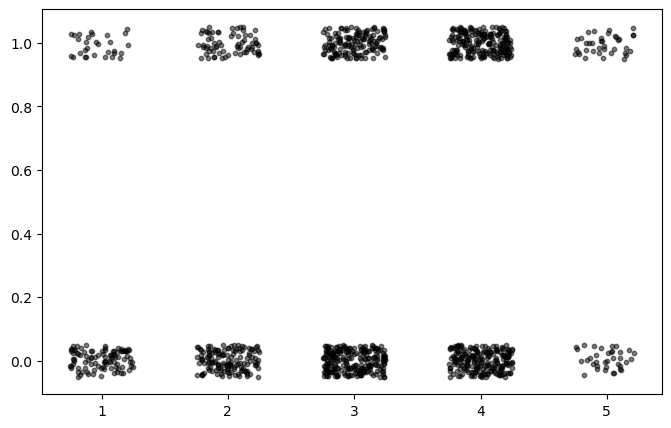

In [6]:
# Especificaciones de figura
fig, ax = plt.subplots(figsize = (8,5))

# Elementos de visualización
x_jitter = np.random.uniform(low=-0.25, high=0.25, size=datos_predictor_unico.shape[0])
y_jitter = np.random.uniform(low=-0.05, high=0.05, size=datos_predictor_unico.shape[0])

ax.scatter(
    x=datos_predictor_unico.income + x_jitter
    ,y=datos_predictor_unico.vote + y_jitter
    ,s=10
    ,color='black'
    ,alpha=0.5
)

plt.show()

Al obsevar los datos, en realidad se puede ver que no hace ningún sentido modelar una regresión lineal ya que esto excedería el dominio de la variable predictora. En cambio, se puede modelar la probabilidad de que $y=1$ con la expresión:

$$P(y=1)=logit^{-1}(X_i\beta)$$

Bajo el supuesto de que las respuestas $y_i$ son independientes dada la distribución de probabilidad. El término $X_i\beta$ representa los predictores lineales, y la función $logit^{-1}$ se encarga de transformar valores continuos al rango $(0, 1)$, lo cual es necesario dado que se están modelando probabilidades, y está dado por la expresión:

$$logit^{-1}(x)=\frac{e^x}{1+e^x}$$